<a href="https://colab.research.google.com/github/sdiaz8/sdiaz8/blob/main/Week9HW(602)_Diaz_Stefan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
import numpy as np  
import pandas as pd 

In [ ]:
#Load data, show first 5 rows, check data, provide information
data = pd.read_csv('/content/train.tsv', delimiter = '\t') 
data.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


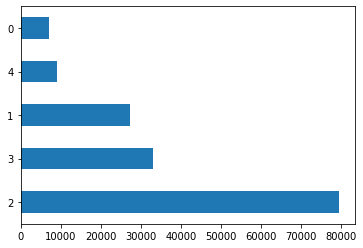

In [ ]:
#distribution of review documents
import matplotlib.pyplot as plt
data['Sentiment'].value_counts().plot.barh()

The sentiment labels are:

0 - negative,
1 - somewhat negative,
2 - neutral,
3 - somewhat positive,
4 - positive

In [ ]:
#Document Term Matrix
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer() 
vector = cv.fit_transform(data)
print(cv.vocabulary_)
print(vector.toarray())

{'phraseid': 1, 'sentenceid': 2, 'phrase': 0, 'sentiment': 3}
[[0 1 0 0]
 [0 0 1 0]
 [1 0 0 0]
 [0 0 0 1]]


In [ ]:
#import ntlk.tokenize and Split data set using "Sentiment' for data
from nltk.tokenize import RegexpTokenizer
from sklearn.model_selection import train_test_split
data1 = data.drop('Phrase',axis=1)
x_train, x_test, y_train, y_test = train_test_split(data1, data.Sentiment, test_size = 0.3)

In [ ]:
#MultinomialNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
clf = MultinomialNB()
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.54079627493699

In [ ]:
#TfidVectorized Data
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectored = vectorizer.fit_transform(data.Phrase)
vectored

<156060x15240 sparse matrix of type '<class 'numpy.float64'>'
	with 972099 stored elements in Compressed Sparse Row format>

In [ ]:
#Transform data and split it to training and test data
x_train, x_test, y_train, y_test = train_test_split(vectored, data.Sentiment, test_size = 0.3)

#Fit Model Using TfidVectoredData
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.5818702208552267

Using the transformed data is more accuarte (58.19%) than the untransformed data (54.09%).